# Feature summary analysis of gender only differential expression

In [1]:
import numpy as np
import pandas as pd
from venn import venn
from matplotlib import pyplot as plt

from plotnine import *
from warnings import filterwarnings
from matplotlib.cbook import mplDeprecation
filterwarnings("ignore",category=mplDeprecation)

## Summary plots

### Genes

In [2]:
genes = pd.read_csv('../../_m/genes/diffExpr_maleVfemale_full.txt', sep='\t')
genes = genes[(genes['adj.P.Val'] < 0.05)].sort_values('adj.P.Val')
genes['Feature'] = genes.index
genes = genes[['Feature', 'Symbol', 'ensemblID', 'logFC', 'adj.P.Val']]
genes['Type'] = 'gene'
genes.head()

,Feature,Symbol,ensemblID,logFC,adj.P.Val,Type
ENSG00000226555.1,ENSG00000226555.1,AGKP1,ENSG00000226555,7.320836,4.214882e-258,gene
ENSG00000229236.1,ENSG00000229236.1,TTTY10,ENSG00000229236,7.483121,5.178977e-253,gene
ENSG00000176728.7,ENSG00000176728.7,TTTY14,ENSG00000176728,8.885118,2.323128e-251,gene
ENSG00000260197.1,ENSG00000260197.1,NaN,ENSG00000260197,7.071476,9.499938e-247,gene
ENSG00000241859.6,ENSG00000241859.6,ANOS2P,ENSG00000241859,7.682882,3.472081e-236,gene


### Transcripts

In [3]:
trans = pd.read_csv('../../_m/transcripts/diffExpr_maleVfemale_full.txt', sep='\t')
trans = trans[(trans['adj.P.Val'] < 0.05)].sort_values('adj.P.Val')
trans['Feature'] = trans.index
trans['ensemblID'] = trans.gene_id.str.replace('\\.\d+', '')
trans = trans[['Feature', 'Symbol', 'ensemblID', 'logFC', 'adj.P.Val']]
trans['Type'] = 'transcript'
trans.head()

,Feature,Symbol,ensemblID,logFC,adj.P.Val,Type
ENST00000602495.1,ENST00000602495.1,XIST,ENSG00000229807,-7.968338,1.271274e-221,transcript
ENST00000429829.5,ENST00000429829.5,XIST,ENSG00000229807,-10.328395,8.167818e-219,transcript
ENST00000440408.5,ENST00000440408.5,TTTY15,ENSG00000233864,6.602124,3.184353e-210,transcript
ENST00000416330.1,ENST00000416330.1,XIST,ENSG00000229807,-7.805614,4.092637e-208,transcript
ENST00000382872.5,ENST00000382872.5,NLGN4Y,ENSG00000165246,6.552963,3.212490e-205,transcript


### Exons

In [4]:
exons = pd.read_csv('../../_m/exons/diffExpr_maleVfemale_full.txt', sep='\t')
exons = exons[(exons['adj.P.Val'] < 0.05)].sort_values('adj.P.Val')
exons['Feature'] = exons.index
exons = exons[['Feature', 'Symbol', 'ensemblID', 'logFC', 'adj.P.Val']]
exons['Type'] = 'exon'
exons.head()

,Feature,Symbol,ensemblID,logFC,adj.P.Val,Type
e1160404,e1160404,XIST,ENSG00000229807,-7.980218,1.451491e-257,exon
e1160425,e1160425,XIST,ENSG00000229807,-7.056620,5.812736e-252,exon
e1160439,e1160439,XIST,ENSG00000229807,-8.172654,2.903277e-251,exon
e1160445,e1160445,XIST,ENSG00000229807,-9.047181,2.719706e-248,exon
e1160436,e1160436,XIST,ENSG00000229807,-8.507586,5.558094e-248,exon


### Junctions

In [5]:
juncs = pd.read_csv('../../_m/junctions/diffExpr_maleVfemale_full.txt', sep='\t')
juncs = juncs[(juncs['adj.P.Val'] < 0.05)].sort_values('adj.P.Val')
juncs['Feature'] = juncs.index
juncs = juncs[['Feature', 'Symbol', 'ensemblID', 'logFC', 'adj.P.Val']]
juncs['Type'] = 'junction'
juncs.head()

,Feature,Symbol,ensemblID,logFC,adj.P.Val,Type
chrX:73833375-73837439(-),chrX:73833375-73837439(-),XIST,ENSG00000229807,-8.258540,3.484117e-225,junction
chrX:73831275-73833237(-),chrX:73831275-73833237(-),XIST,ENSG00000229807,-8.989492,8.639387e-225,junction
chrX:73827985-73829067(-),chrX:73827985-73829067(-),XIST,ENSG00000229807,-8.168128,2.072007e-213,junction
chrX:73822217-73826114(-),chrX:73822217-73826114(-),XIST,ENSG00000229807,-6.305238,1.320986e-212,junction
chrX:73829232-73831065(-),chrX:73829232-73831065(-),XIST,ENSG00000229807,-9.048627,3.785769e-207,junction


## DE summary

### DE (feature)

In [6]:
gg = len(set(genes['Feature']))
tt = len(set(trans['Feature']))
ee = len(set(exons['Feature']))
jj = len(set(juncs['Feature']))

print("\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d" % (gg, tt, ee, jj)) 


Gene:		173
Transcript:	250
Exon:		1401
Junction:	833


#### DE (EnsemblID)

In [7]:
gg = len(set(genes['ensemblID']))
tt = len(set(trans['ensemblID']))
ee = len(set(exons['ensemblID']))
jj = len(set(juncs['ensemblID']))

print("\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d" % (gg, tt, ee, jj)) 


Gene:		173
Transcript:	136
Exon:		233
Junction:	190


#### DE (Gene Symbol)

In [9]:
gg = len(set(genes['Symbol']))
tt = len(set(trans['Symbol']))
ee = len(set(exons['Symbol']))
jj = len(set(juncs['Symbol']))

print("\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d" % (gg, tt, ee, jj)) 


Gene:		892
Transcript:	286
Exon:		1183
Junction:	988


### Feature effect size summary

In [10]:
feature_list = ['Genes', 'Transcript', 'Exons', 'Junctions']
feature_df = [genes, trans, exons, juncs]
for ii in range(4):
    ff = feature_df[ii]
    half = len(set(ff[(np.abs(ff['logFC']) >= 0.5)].Feature))
    one = len(set(ff[(np.abs(ff['logFC']) >= 1)].Feature))
    print("\nThere are %d unique %s with abs(log2FC) >= 0.5" % (half, feature_list[ii]))
    print("There are %d unique %s with abs(log2FC) >= 1" % (one, feature_list[ii]))


There are 71 unique Genes with abs(log2FC) >= 0.5
There are 31 unique Genes with abs(log2FC) >= 1

There are 215 unique Transcript with abs(log2FC) >= 0.5
There are 137 unique Transcript with abs(log2FC) >= 1

There are 818 unique Exons with abs(log2FC) >= 0.5
There are 394 unique Exons with abs(log2FC) >= 1

There are 522 unique Junctions with abs(log2FC) >= 0.5
There are 225 unique Junctions with abs(log2FC) >= 1


In [11]:
feature_list = ['Genes', 'Transcripts', 'Exons', 'Junctions']
feature_df = [genes, trans, exons, juncs]
for ii in range(4):
    ff = feature_df[ii]
    half = len(set(ff[(np.abs(ff['logFC']) >= 0.5)].ensemblID))
    one = len(set(ff[(np.abs(ff['logFC']) >= 1)].ensemblID))
    print("\nThere are %d unique %s with abs(log2FC) >= 0.5" % (half, feature_list[ii]))
    print("There are %d unique %s with abs(log2FC) >= 1" % (one, feature_list[ii]))


There are 71 unique Genes with abs(log2FC) >= 0.5
There are 31 unique Genes with abs(log2FC) >= 1

There are 112 unique Transcripts with abs(log2FC) >= 0.5
There are 67 unique Transcripts with abs(log2FC) >= 1

There are 84 unique Exons with abs(log2FC) >= 0.5
There are 32 unique Exons with abs(log2FC) >= 1

There are 72 unique Junctions with abs(log2FC) >= 0.5
There are 22 unique Junctions with abs(log2FC) >= 1


## Plot venn diagram

In [12]:
features = {
    'Genes': set(genes['ensemblID']),
    'Transcripts': set(trans['ensemblID']),
    'Exons': set(exons['ensemblID']),
    'Junctions': set(juncs['ensemblID']),
}

<Figure size 432x288 with 0 Axes>

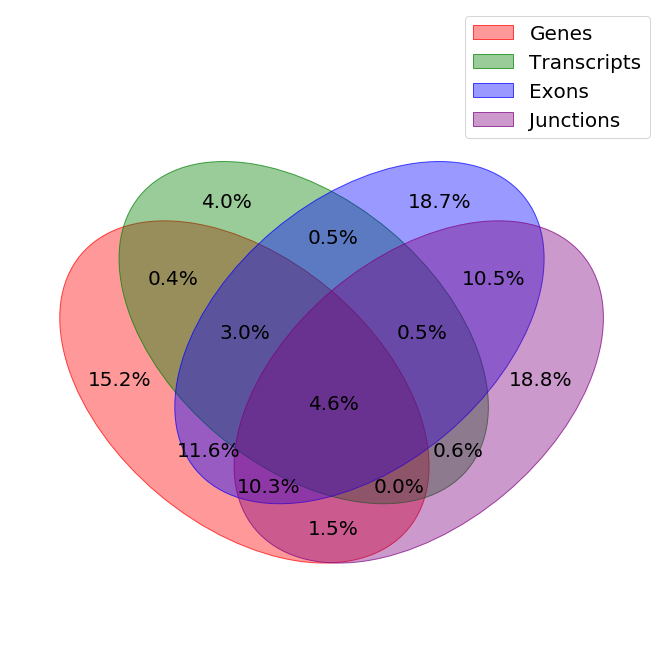

In [13]:
plt.figure(1)
venn(features, fmt="{percentage:0.1f}%", legend_loc="best", figsize=(12,12), 
     fontsize=20, cmap=['red', 'green', 'blue', 'purple'])
plt.savefig('DE_allFeatures_venn_diagram_percentage.png')
plt.savefig('DE_allFeatures_venn_diagram_percentage.pdf')
plt.savefig('DE_allFeatures_venn_diagram_percentage.svg')
plt.show()

<Figure size 432x288 with 0 Axes>

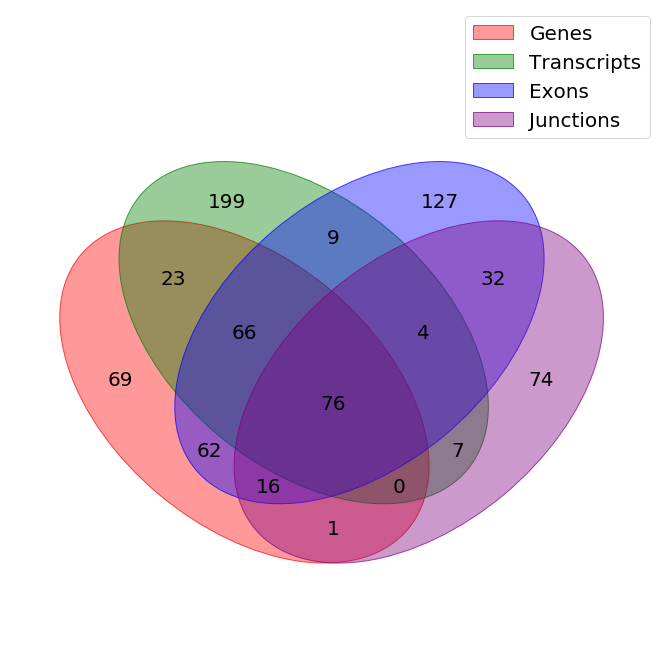

In [13]:
plt.figure(1)
venn(features, fmt="{size}", legend_loc="best", figsize=(12,12), 
     fontsize=20, cmap=['red', 'green', 'blue', 'purple'])
plt.savefig('DE_allFeatures_venn_diagram_size.png')
plt.savefig('DE_allFeatures_venn_diagram_size.pdf')
plt.savefig('DE_allFeatures_venn_diagram_size.svg')
plt.show()

## Autosomal only

In [14]:
import functools
from gtfparse import read_gtf

In [15]:
@functools.lru_cache()
def get_gtf(gtf_file):
    return read_gtf(gtf_file)


In [16]:
def gene_annotation(gtf_file, feature):
    gtf0 = get_gtf(gtf_file)
    gtf = gtf0[gtf0["feature"] == feature]
    return gtf[["gene_id", "gene_name", "transcript_id", "exon_id", "gene_type", "seqname", "start", "end", "strand"]]

In [17]:
gtf_file = '/ceph/genome/human/gencode25/gtf.CHR/_m/gencode.v25.annotation.gtf'

### Genes

In [18]:
gtf_annot = gene_annotation(gtf_file, 'gene')

genes = pd.read_csv('../../_m/genes/diffExpr_maleVfemale_full.txt', 
                    sep='\t')
genes = genes[(genes['adj.P.Val'] < 0.05)].sort_values('adj.P.Val')
genes['Feature'] = genes.index
genes = pd.merge(gtf_annot[['gene_id', 'seqname']], genes, 
                 left_on='gene_id', right_on='Feature', 
                 how='right')
genes.loc[:, 'seqname'] = genes.seqname.fillna('chr?')
genes.sort_values('adj.P.Val').to_csv('chrom_annotation_genes.txt', 
                                      sep='\t', index=False)

genes = genes[(genes.seqname.str.contains('chr\d+')) | 
              (genes['seqname'] == 'chr?')].copy().rename(columns={'seqname': 'chr'})
genes = genes[['Feature', 'chr', 'Symbol', 'ensemblID', 
               'logFC', 'adj.P.Val']]
genes['Type'] = 'gene'
genes.head()

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_status', 'gene_name', 'level', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_status', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'ont', 'protein_id', 'ccdsid']


,Feature,chr,Symbol,ensemblID,logFC,adj.P.Val,Type
0,ENSG00000223764.2,chr1,chr?,ENSG00000223764,-0.371743,0.035044,gene
1,ENSG00000179403.11,chr1,VWA1,ENSG00000179403,-0.282352,0.025370,gene
2,ENSG00000205090.8,chr1,TMEM240,ENSG00000205090,0.132202,0.027470,gene
3,ENSG00000269896.2,chr1,chr?,ENSG00000269896,0.180235,0.044379,gene
4,ENSG00000272449.1,chr1,chr?,ENSG00000272449,0.246846,0.043269,gene


In [19]:
genes[(genes.chr == 'chr?')]

,Feature,chr,Symbol,ensemblID,logFC,adj.P.Val,Type


### Annotate unknown by hand
There are none.

In [20]:
#genes = genes[~(genes['Symbol'].isin(['NLGN4Y', 'JPX', 'PCDH11X', 'GABRE']))]
genes.to_csv('autosomal_DEG.csv', index=False, header=True)
genes.shape

(867, 7)

### Transcripts

In [27]:
gtf_annot = gene_annotation(gtf_file, 'transcript')

trans = pd.read_csv('../../_m/transcripts/diffExpr_maleVfemale_full.txt', 
                    sep='\t')
trans = trans[(trans['adj.P.Val'] < 0.05)].sort_values('adj.P.Val')
trans['Feature'] = trans.index
trans['ensemblID'] = trans.gene_id.str.replace('\\.\d+', '')
trans = pd.merge(gtf_annot[['transcript_id', 'seqname']], trans, 
                 left_on='transcript_id', right_on='Feature', 
                 how='right')
trans.loc[:, 'seqname'] = trans.seqname.fillna('chr?')
trans = trans[(trans.seqname.str.contains('chr\d+')) | 
              (trans['chr'] == 'chr?')].copy()
trans = trans[['Feature', 'chr', 'Symbol', 'ensemblID', 
               'logFC', 'adj.P.Val']]
trans['Type'] = 'transcript'
trans.head()

,Feature,chr,Symbol,ensemblID,logFC,adj.P.Val,Type
0,ENST00000442470.1,chr1,ANKRD65,ENSG00000235098,-0.474226,0.033359,transcript
1,ENST00000354287.4,chr1,FBXO2,ENSG00000116661,0.120887,0.010506,transcript
2,ENST00000548815.2,chr1,NBL1,ENSG00000158747,0.154934,0.042820,transcript
3,ENST00000373921.7,chr1,THEMIS2,ENSG00000130775,-0.382129,0.029922,transcript
4,ENST00000335514.9,chr1,ATPIF1,ENSG00000130770,0.163453,0.005484,transcript


In [28]:
trans[(trans.chr == 'chr?')]

,Feature,chr,Symbol,ensemblID,logFC,adj.P.Val,Type


### Annotate unknown by hand
There are none.

In [29]:
#trans = trans[~(trans['Symbol'].isin(['NLGN4Y']))]
trans.to_csv('transcripts_autosomal_DE.csv', index=False, header=True)
trans.shape

(224, 7)

### Exons

In [30]:
gtf_annot = gene_annotation(gtf_file, 'exon')
gtf_annot['ensemblID'] = gtf_annot.gene_id.str.replace('\\.\d+', '')

exons = pd.read_csv('../../_m/exons/diffExpr_maleVfemale_full.txt', 
                    sep='\t')
exons = exons[(exons['adj.P.Val'] < 0.05)].sort_values('adj.P.Val')
exons['Feature'] = exons.index
exons = pd.merge(gtf_annot[['ensemblID', 'seqname']], exons, 
                 on='ensemblID', how='right')
exons.loc[:, 'seqname'] = exons.seqname.fillna('chr?')
exons = exons[(exons.seqname.str.contains('chr\d+')) | 
              (exons['seqname'] == 'chr?')].copy().rename(columns={'seqname': 'chr'})
exons = exons[['Feature', 'chr', 'Symbol', 'ensemblID', 
               'logFC', 'adj.P.Val']].groupby('Feature').first().reset_index()
exons['Type'] = 'exon'
exons.head()

,Feature,chr,Symbol,ensemblID,logFC,adj.P.Val,Type
0,e1002925,chr18,PHLPP1,ENSG00000081913,-0.184489,0.032482,exon
1,e1002949,chr18,PHLPP1,ENSG00000081913,-0.179063,0.040555,exon
2,e1003849,chr18,RTTN,ENSG00000176225,-0.217014,0.025665,exon
3,e1003851,chr18,RTTN,ENSG00000176225,-0.258503,0.014295,exon
4,e1004000,chr18,RTTN,ENSG00000176225,-0.281958,0.014031,exon


In [31]:
exons[(exons['chr'] == 'chr?')].groupby('ensemblID').first().reset_index()

,ensemblID,Feature,chr,Symbol,logFC,adj.P.Val,Type


### Annotate unknown by hand
There are none.

In [32]:
#exons = exons[~(exons['ensemblID'].isin(['ENSG00000269941']))]
exons.to_csv('exons_autosomal_DE.csv', index=False, header=True)
exons.shape

(3953, 7)

### Junctions

In [33]:
juncs = pd.read_csv('../../_m/junctions/diffExpr_maleVfemale_full.txt', 
                    sep='\t')
juncs = juncs[(juncs['adj.P.Val'] < 0.05)].sort_values('adj.P.Val')
juncs['Feature'] = juncs.index
juncs = pd.merge(gtf_annot[['ensemblID', 'seqname']], juncs, 
                 on='ensemblID', how='right')
juncs.loc[:, 'seqname'] = juncs.seqname.fillna('chr?')
juncs = juncs[(juncs.seqname.str.contains('chr\d+')) | 
              (juncs['seqname'] == 'chr?')].copy().rename(columns={'seqname': 'chr'})
juncs = juncs[['Feature', 'chr', 'Symbol', 'ensemblID', 
               'logFC', 'adj.P.Val']].groupby('Feature').first().reset_index()
juncs['Type'] = 'junction'
juncs.head()

,Feature,chr,Symbol,ensemblID,logFC,adj.P.Val,Type
0,chr10:101002947-101003506(+),chr10,LZTS2,ENSG00000107816,-0.201693,0.023389,junction
1,chr10:102594066-102597139(+),chr10,SUFU,ENSG00000107882,-0.288441,0.013389,junction
2,chr10:103396033-103396408(-),chr10,USMG5,ENSG00000173915,0.202278,0.016074,junction
3,chr10:121551460-121593708(-),chr10,FGFR2,ENSG00000066468,-0.325710,0.049873,junction
4,chr10:121960407-121961422(-),chr10,NSMCE4A,ENSG00000107672,-0.160215,0.039091,junction


In [34]:
juncs[(juncs['chr'] == 'chr?')].groupby('ensemblID').first()

,Feature,chr,Symbol,logFC,adj.P.Val,Type
ensemblID,,,,,,
chr?,chr10:94442020-94447634(+),chr?,chr?,-0.276894,0.049873,junction


### Annotate unknown by hand
- Unknown, chr11

Could have split this by Feature, but using exons is faster

In [35]:
juncs.to_csv('junctions_autosomal_DE.csv', index=False, header=True)
juncs.shape

(1931, 7)

## DE summary

### DE (feature)

In [36]:
gg = len(set(genes['Feature']))
tt = len(set(trans['Feature']))
ee = len(set(exons['Feature']))
jj = len(set(juncs['Feature']))

print("\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d" % (gg, tt, ee, jj)) 


Gene:		867
Transcript:	224
Exon:		3953
Junction:	1931


#### DE (EnsemblID)

In [37]:
gg = len(set(genes.groupby('ensemblID').first().reset_index()['ensemblID']))
tt = len(set(trans.groupby('ensemblID').first().reset_index()['ensemblID']))
ee = len(set(exons.groupby('ensemblID').first().reset_index()['ensemblID']))
jj = len(set(juncs.groupby('ensemblID').first().reset_index()['ensemblID']))

print("\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d" % (gg, tt, ee, jj)) 


Gene:		867
Transcript:	213
Exon:		1146
Junction:	908


#### DE (Gene Symbol)

In [38]:
gg = len(set(genes.groupby('Symbol').first().reset_index()['Symbol']))
tt = len(set(trans.groupby('Symbol').first().reset_index()['Symbol']))
ee = len(set(exons.groupby('Symbol').first().reset_index()['Symbol']))
jj = len(set(juncs.groupby('Symbol').first().reset_index()['Symbol']))

print("\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d" % (gg, tt, ee, jj)) 


Gene:		782
Transcript:	213
Exon:		1081
Junction:	908


### Feature effect size summary

In [39]:
feature_list = ['Genes', 'Transcript', 'Exons', 'Junctions']
feature_df = [genes, trans, exons, juncs]
for ii in range(4):
    ff = feature_df[ii]
    half = len(set(ff[(np.abs(ff['logFC']) >= 0.5)].Feature))
    one = len(set(ff[(np.abs(ff['logFC']) >= 1)].Feature))
    print("\nThere are %d unique %s with abs(log2FC) >= 0.5" % (half, feature_list[ii]))
    print("There are %d unique %s with abs(log2FC) >= 1" % (one, feature_list[ii]))


There are 27 unique Genes with abs(log2FC) >= 0.5
There are 2 unique Genes with abs(log2FC) >= 1

There are 69 unique Transcript with abs(log2FC) >= 0.5
There are 34 unique Transcript with abs(log2FC) >= 1

There are 234 unique Exons with abs(log2FC) >= 0.5
There are 4 unique Exons with abs(log2FC) >= 1

There are 220 unique Junctions with abs(log2FC) >= 0.5
There are 39 unique Junctions with abs(log2FC) >= 1


In [40]:
feature_list = ['Genes', 'Transcripts', 'Exons', 'Junctions']
feature_df = [genes, trans, exons, juncs]
for ii in range(4):
    ff = feature_df[ii]
    half = len(set(ff[(np.abs(ff['logFC']) >= 0.5)].ensemblID))
    one = len(set(ff[(np.abs(ff['logFC']) >= 1)].ensemblID))
    print("\nThere are %d unique %s with abs(log2FC) >= 0.5" % (half, feature_list[ii]))
    print("There are %d unique %s with abs(log2FC) >= 1" % (one, feature_list[ii]))


There are 27 unique Genes with abs(log2FC) >= 0.5
There are 2 unique Genes with abs(log2FC) >= 1

There are 67 unique Transcripts with abs(log2FC) >= 0.5
There are 33 unique Transcripts with abs(log2FC) >= 1

There are 34 unique Exons with abs(log2FC) >= 0.5
There are 3 unique Exons with abs(log2FC) >= 1

There are 39 unique Junctions with abs(log2FC) >= 0.5
There are 1 unique Junctions with abs(log2FC) >= 1


## Plot venn diagram

In [41]:
features = {
    'Genes': set(genes['ensemblID']),
    'Transcripts': set(trans['ensemblID']),
    'Exons': set(exons['ensemblID']),
    'Junctions': set(juncs['ensemblID']),
}

<Figure size 432x288 with 0 Axes>

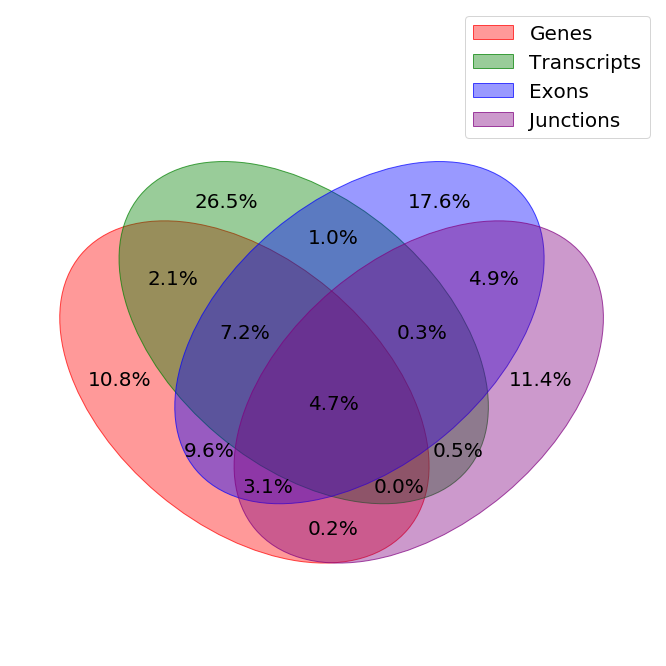

In [32]:
plt.figure(1)
venn(features, fmt="{percentage:0.1f}%", legend_loc="best", figsize=(12,12), 
     fontsize=20, cmap=['red', 'green', 'blue', 'purple'])
plt.savefig('DE_autosomal_allFeatures_venn_diagram_percentage.png')
plt.savefig('DE_autosomal_allFeatures_venn_diagram_percentage.pdf')
plt.savefig('DE_autosomal_allFeatures_venn_diagram_percentage.svg')
plt.show()

<Figure size 432x288 with 0 Axes>

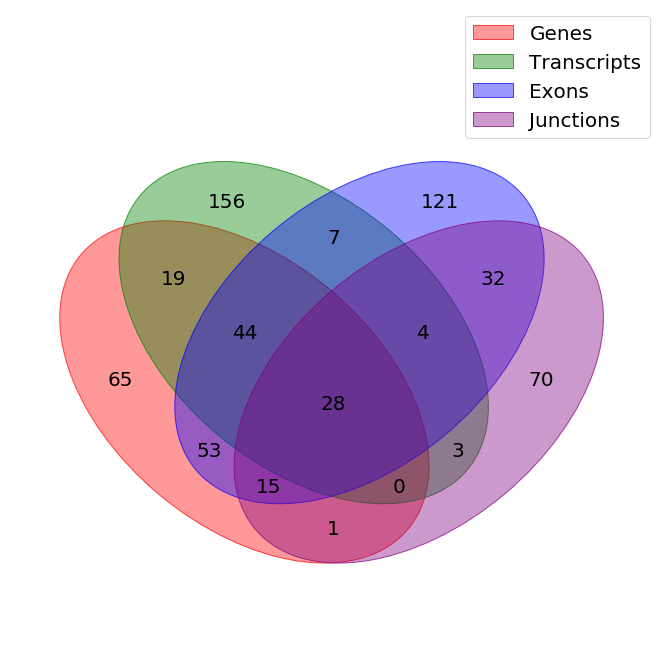

In [132]:
plt.figure(1)
venn(features, fmt="{size}", legend_loc="best", figsize=(12,12), 
     fontsize=20, cmap=['red', 'green', 'blue', 'purple'])
plt.savefig('DE_autosomal_allFeatures_venn_diagram_size.png')
plt.savefig('DE_autosomal_allFeatures_venn_diagram_size.pdf')
plt.savefig('DE_autosomal_allFeatures_venn_diagram_size.svg')
plt.show()